Nesse notebook contém um resumo dos testes e experimentos com o uso da biblioteca pandasai: https://github.com/gventuri/pandas-ai

In [2]:
# Importanto bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import os

from pandasai import SmartDataframe
from dotenv import load_dotenv
from sklearn.datasets import load_iris
from pandasai.llm.openai import OpenAI

In [3]:
# Carregando variavel de ambiente
load_dotenv()

True

In [4]:
# Carregando os dados
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Species'] = data.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
# Configuração do token para acesso ao modelo da OpenAI
api_key = os.getenv("OPENAI_API_KEY")
llm = OpenAI(api_token=api_key)

In [7]:
df = SmartDataframe(df, config={'llm': llm})

In [8]:
df.chat('What are the column names of this dataset?')

'sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), Species'

In [9]:
df.chat("Create a new column named 'SUM' and sum all columns except 'Species'. Place this new column in the first column index.")

,SUM,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,20.4,5.1,3.5,1.4,0.2,0
1,19.0,4.9,3.0,1.4,0.2,0
2,18.8,4.7,3.2,1.3,0.2,0
3,18.8,4.6,3.1,1.5,0.2,0
4,20.4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,34.4,6.7,3.0,5.2,2.3,2
146,31.4,6.3,2.5,5.0,1.9,2
147,33.4,6.5,3.0,5.2,2.0,2
148,34.6,6.2,3.4,5.4,2.3,2


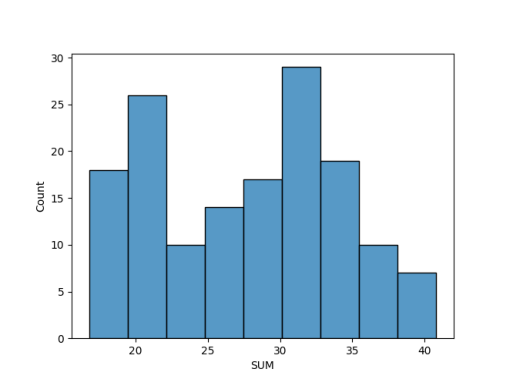

In [10]:
df.chat('Plot a histogram to column SUM, using seaborn')

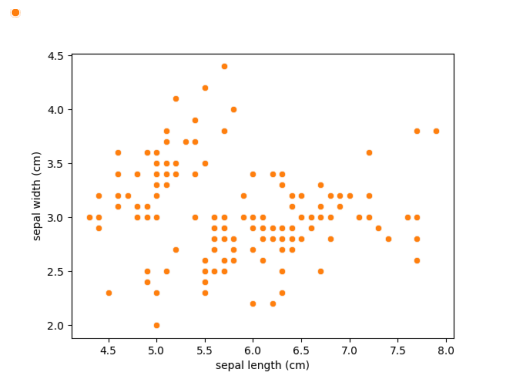

In [11]:
df.chat('plot a scatterplot using seaborn of the sepal length (cm) and sepal width (cm)')

In [12]:
df.chat('Give the statistical summary of all data')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species,SUM
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,27.716000
std,0.828066,0.435866,1.765298,0.762238,0.819232,6.247524
min,4.300000,2.000000,1.000000,0.100000,0.000000,16.800000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,21.400000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,28.600000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,32.500000
max,7.900000,4.400000,6.900000,2.500000,2.000000,40.800000


In [14]:
df.chat('This dataset contain nan or null values ?')

'This dataset does not contain null or NaN values.'